In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data=pd.read_csv('winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


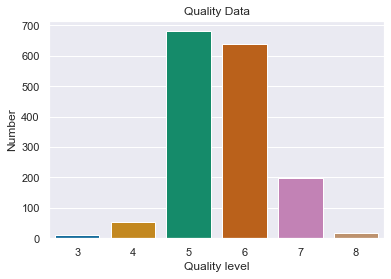

   quality
5      681
6      638
7      199
4       53
8       18
3       10


In [41]:
sns.countplot(x='quality',data=data)
plt.title('Quality Data')
plt.xlabel('Quality level')
plt.ylabel('Number')
plt.show()
print(pd.DataFrame(data['quality'].value_counts()))

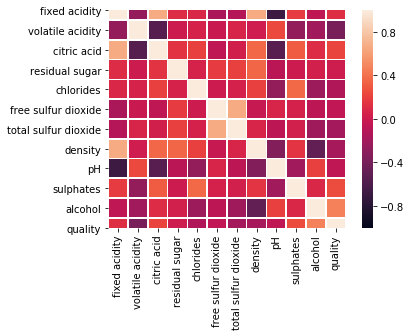

In [9]:
data.corr()
sns.heatmap(data.corr(),annot=False,square=True,vmin=-1,vmax=1,linewidths=.6)

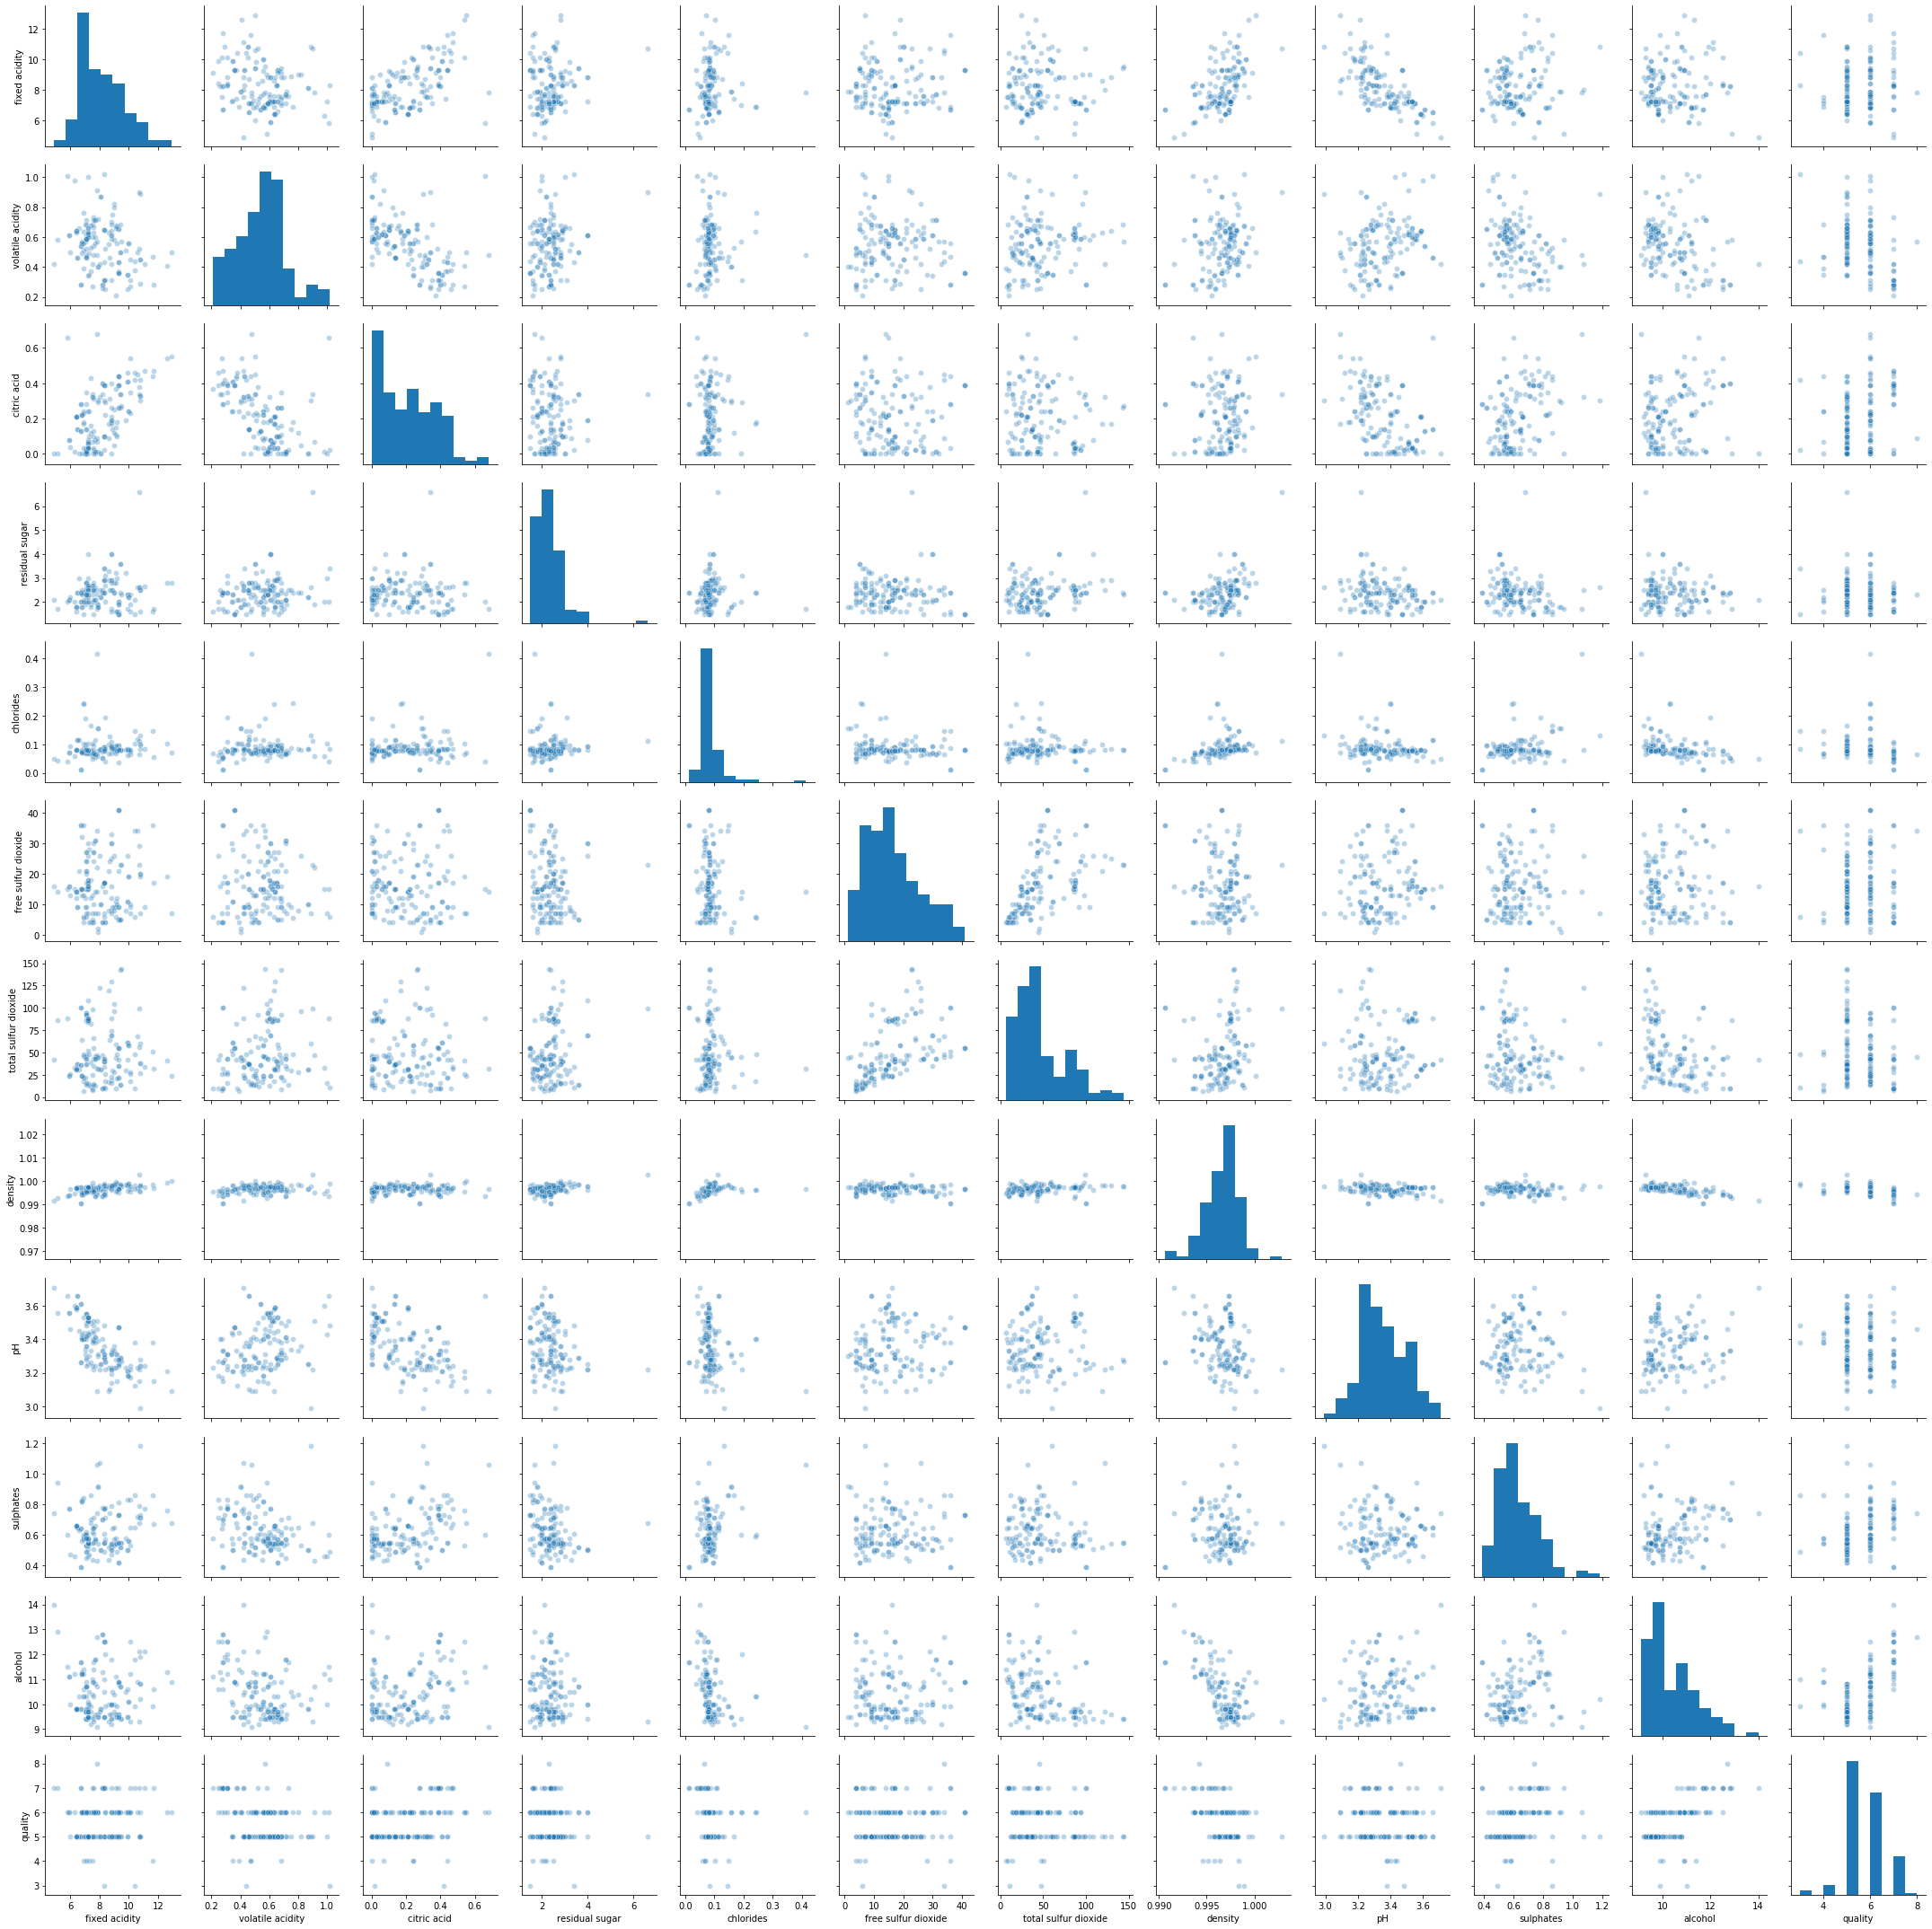

In [11]:
sample_data=data.iloc[750:900]
sns.pairplot(sample_data,plot_kws={'alpha':0.3})

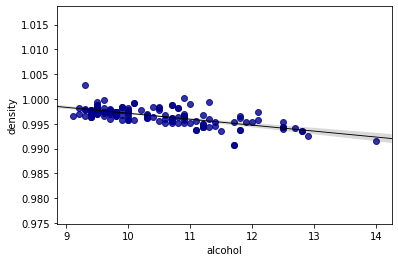

In [12]:
sns.regplot('alcohol','density',data=sample_data,color='darkblue',line_kws={'linewidth':0.9,'color':'black'})

In [13]:
group_bin=[0,4,6,10]
group_labels=['Poor','Acceptable','Good']
data['group']=pd.cut(data.quality,group_bin,3, labels=group_labels)

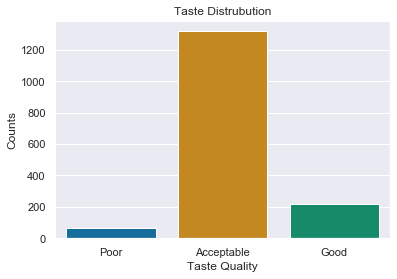

,group
Acceptable,1319
Good,217
Poor,63


In [42]:
sns.set(palette="colorblind")
sns.countplot(x='group',data=data)
plt.title('Taste Distrubution')
plt.xlabel('Taste Quality')
plt.ylabel('Counts')
plt.show()
(pd.DataFrame(data['group'].value_counts()))

In [26]:
X = data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_y.fit_transform(y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [38]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [37]:
svc = SVC()
svc.fit(X_train,y_train)
pred_svc =svc.predict(X_test)

In [45]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       277
           1       1.00      1.00      1.00        30
           2       1.00      0.77      0.87        13

    accuracy                           0.99       320
   macro avg       1.00      0.92      0.95       320
weighted avg       0.99      0.99      0.99       320



In [46]:
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        13

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [47]:
conclusion = pd.DataFrame({'models': ["SVC","Random Forest"],
                           'accuracies': [accuracy_score(y_test,pred_svc),accuracy_score(y_test,pred_rfc)]})
conclusion

,models,accuracies
0,SVC,0.990625
1,Random Forest,1.000000
